**TABLE PREPROCESSING**

In [ ]:

import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("india_shares.csv")
print(df.head())

      Date  Mobile  Desktop  Tablet
0  2009-01    2.14    97.86     0.0
1  2009-02    2.46    97.54     0.0
2  2009-03    2.76    97.24     0.0
3  2009-04    2.49    97.51     0.0
4  2009-05    2.76    97.24     0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     180 non-null    object 
 1   Mobile   180 non-null    float64
 2   Desktop  180 non-null    float64
 3   Tablet   180 non-null    float64
dtypes: float64(3), object(1)
memory usage: 5.8+ KB


In [ ]:
df.isnull()

,Date,Mobile,Desktop,Tablet
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
175,False,False,False,False
176,False,False,False,False
177,False,False,False,False
178,False,False,False,False


In [ ]:
df.describe()


,Mobile,Desktop,Tablet
count,180.000000,180.000000,180.000000
mean,59.261611,40.204222,0.533944
std,24.372951,24.619936,0.401769
min,2.140000,18.190000,0.000000
25%,52.785000,23.087500,0.330000
50%,70.180000,28.940000,0.455000
75%,76.275000,46.655000,0.800000
max,81.090000,97.860000,1.330000


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [ ]:
df.shape

(180, 4)

**TEXT PREPROCESSING**

In [ ]:
import numpy as np
import pandas as pd
import nltk

full_df = pd.read_csv("netflix.csv")
df["synopsis"] = full_df[["synopsis"]].copy()
df.head()

#lowercase conversion
df["text_lower"] = df["synopsis"].iloc[:, 0].str.lower()
print("------LowerCase text------")
print(df["text_lower"])

#stopwords removal
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text_wo_stop"] = df["text_lower"].apply(lambda text: remove_stopwords(text))
print("------Stopwords removed sentences------")
print(df["text_wo_stop"])

#Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["text_lower"].apply(lambda text: stem_words(text))
print("------Stemming------")
print(df["text_stemmed"])


#tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
def token(text):
  return word_tokenize(text)
df["token_words"]=df["text_lower"].apply(lambda text: token(text))
print("-----Tokenization------")
print(df["token_words"])



------LowerCase text------
0       season 1 of the hit sitcom introduces us to ha...
1       rachel gets jealous of ross's new girlfriend, ...
2       the shenanigans of the tightest circle of frie...
3       chandler makes amends to joey by spending than...
4       the friends continue to haphazardly navigate t...
                              ...                        
4363    a solitary young woman and a lonely widow make...
4364    immortal renegade philly the kid and his trans...
4365    a separated couple live together for their chi...
4366    a genetics professor experiments with a treatm...
4367    in season 1, the well-ordered personal and pro...
Name: synopsis, Length: 4368, dtype: object
------Stopwords removed sentences------
0       season 1 hit sitcom introduces us hapless ross...
1       rachel gets jealous ross's new girlfriend, mon...
2       shenanigans tightest circle friends -- includi...
3       chandler makes amends joey spending thanksgivi...
4       friends c

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


------Stemming------
0       season 1 of the hit sitcom introduc us to hapl...
1       rachel get jealou of ross' new girlfriend, mon...
2       the shenanigan of the tightest circl of friend...
3       chandler make amend to joey by spend thanksgiv...
4       the friend continu to haphazardli navig their ...
                              ...                        
4363    a solitari young woman and a lone widow make a...
4364    immort renegad philli the kid and hi transform...
4365    a separ coupl live togeth for their child' sak...
4366    a genet professor experi with a treatment for ...
4367    in season 1, the well-ord person and professio...
Name: synopsis, Length: 4368, dtype: object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


-----Tokenization------
0       [season, 1, of, the, hit, sitcom, introduces, ...
1       [rachel, gets, jealous, of, ross, 's, new, gir...
2       [the, shenanigans, of, the, tightest, circle, ...
3       [chandler, makes, amends, to, joey, by, spendi...
4       [the, friends, continue, to, haphazardly, navi...
                              ...                        
4363    [a, solitary, young, woman, and, a, lonely, wi...
4364    [immortal, renegade, philly, the, kid, and, hi...
4365    [a, separated, couple, live, together, for, th...
4366    [a, genetics, professor, experiments, with, a,...
4367    [in, season, 1, ,, the, well-ordered, personal...
Name: synopsis, Length: 4368, dtype: object


In [ ]:
print(df)

0               Season 1 of the hit sitcom introduces us to ha...
1               Rachel gets jealous of Ross's new girlfriend, ...
2               The shenanigans of the tightest circle of frie...
3               Chandler makes amends to Joey by spending Than...
4               The friends continue to haphazardly navigate t...
                                      ...                        
synopsis                                                      ...
text_lower      0       season 1 of the hit sitcom introduces ...
text_wo_stop    0       season 1 hit sitcom introduces us hapl...
text_stemmed    0       season 1 of the hit sitcom introduc us...
token_words     0       [season, 1, of, the, hit, sitcom, intr...
Name: synopsis, Length: 4373, dtype: object


**IMAGE PREPROCESSING**

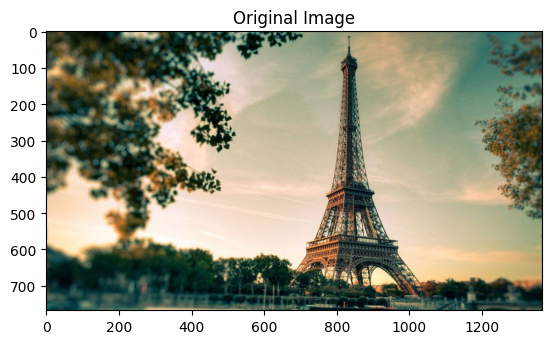

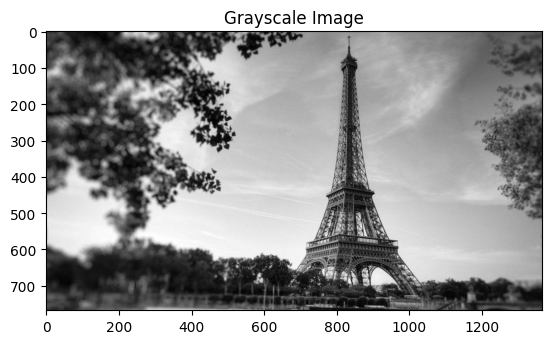

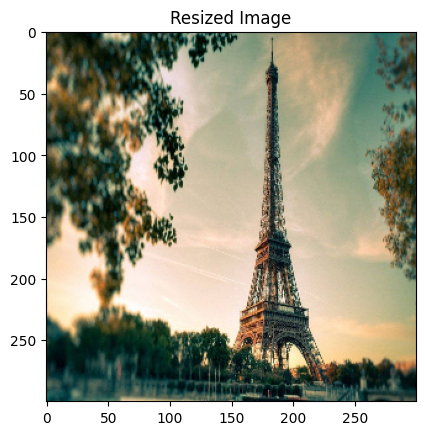

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image from file
image_path = 'img.jpg'
original_image = cv2.imread(image_path)

# Display the original image
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

# Convert the image to grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Resize the image
target_size = (300, 300)
resized_image = cv2.resize(original_image, target_size)

# Display the resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.show()
